<a href="https://colab.research.google.com/github/meghutch/Breast-Cancer-Classification-Clinical-Genomic/blob/master/Gene_Expression_Analysis_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Clinical Outcomes of Breast Cancer Patients - Gene Expression Data**

## **Principal Component Analysis**

**Author:** Meg Hutch

**Date:** November 15, 2019

**Objective:** Analyzing the data from Lee's ML course

In [0]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

In [2]:
# Connect Colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# Import Data
gene_data = pd.read_csv('/content/drive/My Drive/Projects/Breast_Cancer_Classification/Data/merged_expression.txt', sep=',')

In [0]:
#gene_data.head()
#genes.info()

**Check if NAs**

In [5]:
gene_data.isna().any()

Unnamed: 0    False
EVENT          True
OS_MONTHS     False
FIVE_YEAR      True
RERE          False
              ...  
CC2D1A        False
CB986545      False
IGSF9         False
DA110839      False
FAM71A         True
Length: 24372, dtype: bool

**Remove cases where there are missing values**

In [0]:
gene_data = gene_data.dropna()

In [7]:
gene_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 0 to 1903
Columns: 24372 entries, Unnamed: 0 to FAM71A
dtypes: float64(24371), object(1)
memory usage: 324.9+ MB


**Create a dataset just containing gene expression**

In [0]:
# remove event, os_motnhs, and Five_Year from the dataset
genes = gene_data.drop(columns=["Unnamed: 0", "EVENT", "OS_MONTHS", "FIVE_YEAR"])

# **Principal Component Analysis**

**What is a Pricipal Component? (From DataCamp)**

Principal componenets have both direction and magnitude. The direction represents across which principal axes the data is mostly spread out or has the most variance and the magnitude signifies the aount of varaince that Principal Component captures of the data when projected onto that axis. 

The principal components are a straight line, and the first principal component holds the most variance in the data. Each subsequent prinicpal component is orthogonal to the last and has a lesser variance .

Correlated features contribute to the same principal component, thereby reducing the original data features into uncorrelated prinicpal components; each representing a different set of correlated features with differents of variation.

Each principal component represents a percentage of total variation captures from the data


References:

* https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

* https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

* https://towardsdatascience.com/a-one-stop-shop-for-principal-component-analysis-5582fb7e0a9c

**1) Standardize the Data**

PCA is effected by scale so you must scale features in your data before applying PCA. **StandardScaler** helps standardize features onto unit scale (mean = 0 and standard deviation = 1). This, each value in the dataset will have the sample mean value subtracted and then divided by the standard deviation of the whole dataset. 


In [0]:
from sklearn.preprocessing import StandardScaler 

x = StandardScaler().fit_transform(genes)

Let's check whether the normalized data has a mean of zero and a standard deviation of one. 

In [10]:
np.mean(x), np.std(x)

(4.1760406566772064e-19, 0.9999999999999999)

Convert the normalized features into tabular format 

In [0]:
# Create list of column names
features = list(genes.columns.values) 

# Create data frame of newly normalized data
x = pd.DataFrame(x, columns = features)

**2) PCA Projection to 2D**

In [0]:
from sklearn.decomposition import PCA 

pca = PCA(n_components = 2)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

In [13]:
principalDf

,principal component 1,principal component 2
0,-46.927916,4.739975
1,-11.099103,-33.901961
2,-96.985058,-24.940919
3,-88.693562,-21.679792
4,-24.570042,-9.740269
...,...,...
1742,-54.051508,-14.065397
1743,-30.199493,-2.340925
1744,-46.568089,-10.402574
1745,-39.894574,-16.699317


In [0]:
# the below function is trying to concatenate the princpalDf to a dataframe that has labels 
label = gene_data.FIVE_YEAR
label = pd.DataFrame(label)

label = label.reset_index(drop=True)
prinicpalDf = principalDf.reset_index(drop=True)

finalDf = pd.concat([principalDf, label], axis=1)

In [15]:
finalDf

,principal component 1,principal component 2,FIVE_YEAR
0,-46.927916,4.739975,1.0
1,-11.099103,-33.901961,1.0
2,-96.985058,-24.940919,1.0
3,-88.693562,-21.679792,1.0
4,-24.570042,-9.740269,0.0
...,...,...,...
1742,-54.051508,-14.065397,1.0
1743,-30.199493,-2.340925,0.0
1744,-46.568089,-10.402574,1.0
1745,-39.894574,-16.699317,1.0


**3) Visualize 2D Projection**

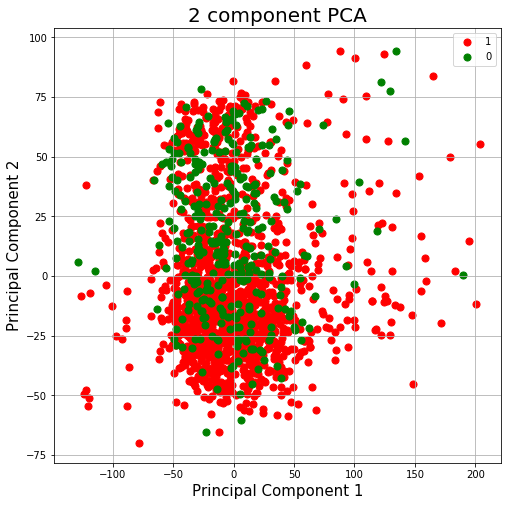

In [16]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


targets = [1, 0] #make sure this is labeled correctly
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['FIVE_YEAR'] ==  target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

The explained variance tells you how much information (variance) can be attributed to each of the prinicpal componenets. This is important as while you can convert 4 dimensional space to 2 dimensional space, you lose some of the varaince (information) when you do this. By using the attribute **explained_varaince_ratio_** you cna see how much variation the first prinicpal component and second component contain. Additionally, we can determine how much information the two components together contain. 

In [17]:
print('Component Variation', pca.explained_variance_ratio_)
print('Total Variation', sum(pca.explained_variance_ratio_))

Component Variation [0.06538998 0.04392725]
Total Variation 0.10931722435423394


**4) Determine # of Components and Variance**

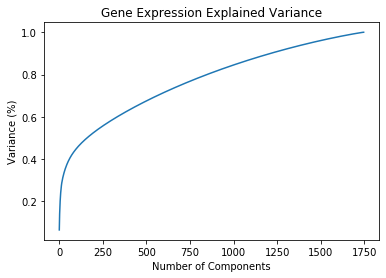

In [18]:
pca = PCA().fit(x)

#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Gene Expression Explained Variance')
plt.show()

The plot tells us that with ~1250 components we can capture 90% of the data. 

In [0]:
# 100 Prinicipal Components
pca = PCA(n_components = 100)

# Fit components with normalized data
principalComponents = pca.fit_transform(x)

# Generate a vector of column names with the number for each prinicpal component 
col_names = [f'principal component {i}' for i in range(1, 101)]

# Add column names to the principal component dataset 
principalDf = pd.DataFrame(principalComponents, columns = col_names)

In [20]:
principalComponents

array([[-46.92791594,   4.73997594, -55.99933227, ...,   0.35332422,
          0.14842375,  -5.73560803],
       [-11.099104  , -33.90189424,  15.78511389, ...,  -3.57709156,
          2.99536889,  -5.05040452],
       [-96.98505872, -24.94090594,  28.62465774, ...,  -2.58790726,
         -3.84073074,   8.17424822],
       ...,
       [-46.5680879 , -10.40262235,  44.05713059, ...,  -3.73891702,
          3.36151311,  -1.57733571],
       [-39.8945741 , -16.69929388,  21.70979834, ...,   1.80335908,
          2.24099723,   1.95570538],
       [-41.86364854,  18.08299549,   7.80661058, ...,  -0.94656383,
         -2.50662097,  -1.99153685]])

In [0]:
# the below function is trying to concatenate the princpalDf to a dataframe that has labels 
label = gene_data.FIVE_YEAR
label = pd.DataFrame(label)

label = label.reset_index(drop=True)
prinicpalDf = principalDf.reset_index(drop=True)

finalDf = pd.concat([principalDf, label], axis=1)

In [22]:
finalDf

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7,principal component 8,principal component 9,principal component 10,principal component 11,principal component 12,principal component 13,principal component 14,principal component 15,principal component 16,principal component 17,principal component 18,principal component 19,principal component 20,principal component 21,principal component 22,principal component 23,principal component 24,principal component 25,principal component 26,principal component 27,principal component 28,principal component 29,principal component 30,principal component 31,principal component 32,principal component 33,principal component 34,principal component 35,principal component 36,principal component 37,principal component 38,principal component 39,principal component 40,...,principal component 62,principal component 63,principal component 64,principal component 65,principal component 66,principal component 67,principal component 68,principal component 69,principal component 70,principal component 71,principal component 72,principal component 73,principal component 74,principal component 75,principal component 76,principal component 77,principal component 78,principal component 79,principal component 80,principal component 81,principal component 82,principal component 83,principal component 84,principal component 85,principal component 86,principal component 87,principal component 88,principal component 89,principal component 90,principal component 91,principal component 92,principal component 93,principal component 94,principal component 95,principal component 96,principal component 97,principal component 98,principal component 99,principal component 100,FIVE_YEAR
0,-46.927916,4.739976,-55.999332,32.035664,19.910327,22.467124,-9.464583,27.687378,40.899387,17.413664,12.874126,23.709718,-15.148509,-0.865480,9.578477,43.509341,8.147630,-0.625955,17.645075,-1.618973,9.019823,4.457683,4.518079,-4.937906,-24.213696,8.106651,13.850101,1.109611,6.632134,-3.497648,7.402637,-6.766772,6.954198,-2.207885,20.363832,1.952470,4.001967,-5.774109,14.481782,-1.432400,...,-6.204219,-2.106273,2.115288,0.215775,6.865856,5.833266,5.046672,-4.163628,-6.259980,-4.139037,-7.559927,10.524544,-2.836606,12.129085,4.241912,9.000577,3.583163,5.787557,-10.134249,-4.439234,9.254485,-1.443239,5.370620,5.256249,-5.833328,15.013437,3.187856,-4.340486,-4.348586,-14.233659,9.127227,-0.243058,-2.542066,5.148303,15.066175,-0.741169,0.353324,0.148424,-5.735608,1.0
1,-11.099104,-33.901894,15.785114,-4.082658,-4.467048,13.386620,-3.602027,-9.460577,13.669762,-10.658357,5.732476,-4.388901,-30.802218,-11.101859,-9.150607,-18.567055,4.756870,7.048941,-40.085910,10.763701,8.341524,0.161811,6.882542,4.774319,3.674414,9.484552,2.276440,16.804045,-6.103678,-5.760153,5.590930,0.144842,-19.576115,-1.117122,2.153278,-0.806960,8.219055,-14.115454,-1.605687,-26.660158,...,4.954713,-4.329583,-2.568407,-2.283912,0.360589,-6.032806,-5.489137,-4.984389,10.669437,5.280916,-17.850149,-8.543463,9.704414,-5.555657,8.487933,-1.051056,4.721061,1.885978,19.231510,-5.678829,-4.336807,-1.208328,-1.834607,2.348022,-1.327251,3.994555,-3.704465,3.959343,6.407911,-5.722430,0.404037,2.118305,7.439944,9.608694,-18.882191,-3.110838,-3.577092,2.995369,-5.050405,1.0
2,-96.985059,-24.940906,28.624658,36.686919,-30.138800,11.416279,14.569905,-46.678033,-3.364675,3.969207,0.891319,-13.955752,12.792117,19.411776,18.536708,9.425632,13.734456,1.497395,-8.534965,18.240755,9.333535,-5.292118,0.957033,10.117977,10.854827,4.348217,2.285314,12.438479,-6.132571,-1.554165,9.489973,-12.596656,-9.526775,-6.432752,-13.660514,7.711601,3.748915,-8.414847,-1.833079,-18.691110,...,-9.072368,-2.067779,-10.439061,7.824362,-4.385667,3.105435,-6.249190,-11.703167,4.331610,0.372345,-2.738592,9.223972,-3.960700,3.667528,4.204655,-4.844570,0.532147,7.600021,-4.732739,-1.895008,8.025333,-0.985066,5.8

**5) Fitting Principal Components to Data**

I'm specifically following the datacamp reference now: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

**Fit PCA to the data**

In [23]:
pca = PCA(0.9)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

**Determine how many n_components are actually needed to capture 0.9 variance**

In [24]:
pca.n_components_

1213

This function indicates that 1213 is the number of principal componenets needed to capture 90% of the variation which is what I had estiamted from the above plot.

Next, we can transform the data to generate a transformed dataset from the parameters generated from the fit model. 

In [0]:
transformed_data  = pca.transform(genes)

In [26]:
transformed_data.shape # this has 1213 columns - or principal components!

(1747, 1213)

In [27]:
transformed_data

array([[ 4.69954788e+01,  5.33508534e+01,  9.31418798e+01, ...,
         1.26209074e+00, -5.30103733e+00,  4.34902248e-01],
       [ 6.42903770e+01,  2.69784530e+01,  1.34218334e+02, ...,
         1.73327119e+00, -5.80124581e+00,  1.71801198e-04],
       [ 2.57819654e+01,  3.62916894e+01,  1.37009006e+02, ...,
         1.01551100e+00, -5.67437392e+00,  5.75925136e-01],
       ...,
       [ 4.49895023e+01,  4.24873165e+01,  1.50039783e+02, ...,
         2.18061586e+00, -5.01412271e+00,  1.63536455e+00],
       [ 4.96881117e+01,  3.92607352e+01,  1.38898150e+02, ...,
         1.99220431e+00, -5.85735567e+00,  1.42753640e+00],
       [ 4.65486252e+01,  5.95339077e+01,  1.31086878e+02, ...,
         1.32067366e+00, -4.85684490e+00,  1.16305128e+00]])

**Questions:**

1) Is there a such thing as too many prinicipal components?

2) Also, is this just the data that I feed into the ML model? I'm not sure I understand what the specific values are? The normalized gene expression? 